<a href="https://colab.research.google.com/github/hariharannatesh/Dimension-Estimation-from-Depth-Map-of-Monocular-Image/blob/master/Encoder_dimest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from google.colab.patches import cv2_imshow
from tensorflow.keras import models
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

2079
(424, 512)
(2079, 424, 512, 1)
(2079, 4)
(2079,)


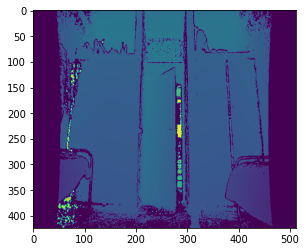

In [ ]:
X=np.load('/content/gdrive/My Drive/Dataset/Autoencoder_arrays/Final Array after concatenation/images_depth_autoencoder.npy')
coordinates=np.load('/content/gdrive/My Drive/Dataset/Autoencoder_arrays/Final Array after concatenation/coordinates_autoencoder.npy')
Y=np.load('/content/gdrive/My Drive/Dataset/Autoencoder_arrays/Final Array after concatenation/target_depth_autoencoder.npy')
print(len(X))
print(X[0].shape)
plt.imshow(X[0])
X=np.reshape(X,(len(X),424,512,1))
X=X/255.0
print(X.shape)
print(coordinates.shape)
print(Y.shape)

In [ ]:
encoder=load_model('/content/gdrive/My Drive/save_model/conv_encoder.h5')

In [ ]:
encoded_X=encoder.predict(X)
print(encoded_X.shape)

(2079, 53, 32, 32)


In [ ]:
encoded_X_flat=encoded_X.reshape(2079,53*32*32)
print(encoded_X_flat.shape)
encoded_Xcoord=np.concatenate((encoded_X_flat,coordinates),axis=1)
print(encoded_Xcoord.shape)
print(len(encoded_Xcoord))


(2079, 54272)
(2079, 54276)
2079


In [ ]:
eX_train,eX_test,Y_train,Y_test=train_test_split(encoded_Xcoord,Y,test_size=0.2,random_state=100)

In [ ]:
#eX_train=eX_train.transpose()
print(eX_train.shape)
#eX_test=eX_test.transpose()
print(eX_test.shape)

(1663, 54276)
(416, 54276)


In [ ]:
dimension_est=load_model('/content/gdrive/My Drive/save_model/dimestencoder.h5')

In [ ]:
dimension_est.evaluate(eX_test,Y_test)

13/13 [==============================] - 1s 86ms/step - loss: 58.8116


58.81162643432617

In [ ]:
input_val=Input(shape=(54276,))
nn=Dense(1000,activation='relu',use_bias=True)(input_val)
nn=Dense(100,activation='relu',use_bias=True)(nn)
output=Dense(1)(nn)

In [ ]:
dimest_model=Model(input_val,output)
dimest_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 54276)]           0         
_________________________________________________________________
dense (Dense)                (None, 1000)              54277000  
_________________________________________________________________
dense_1 (Dense)              (None, 100)               100100    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 54,377,201
Trainable params: 54,377,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mc=ModelCheckpoint('/content/gdrive/My Drive/save_model/dimestencoder.h5',monitor='val_loss',mode='min',verbose=1,save_best_only=True)

In [ ]:
dimest_model.compile(optimizer='rmsprop',loss='mean_squared_error')
history=dimest_model.fit(x=eX_train,y=Y_train,shuffle=1,validation_split=0.2,initial_epoch=0,epochs=100,callbacks=[mc])

Epoch 1/100
42/42 [==============================] - ETA: 0s - loss: 2113.5461
Epoch 00001: val_loss improved from inf to 1829.05652, saving model to /content/gdrive/My Drive/save_model/dimestencoder.h5
42/42 [==============================] - 26s 612ms/step - loss: 2113.5461 - val_loss: 1829.0565
Epoch 2/100
42/42 [==============================] - ETA: 0s - loss: 1437.3107
Epoch 00002: val_loss improved from 1829.05652 to 1080.27283, saving model to /content/gdrive/My Drive/save_model/dimestencoder.h5
42/42 [==============================] - 26s 610ms/step - loss: 1437.3107 - val_loss: 1080.2728
Epoch 3/100
42/42 [==============================] - ETA: 0s - loss: 986.0554
Epoch 00003: val_loss improved from 1080.27283 to 584.87366, saving model to /content/gdrive/My Drive/save_model/dimestencoder.h5
42/42 [==============================] - 27s 633ms/step - loss: 986.0554 - val_loss: 584.8737
Epoch 4/100
42/42 [==============================] - ETA: 0s - loss: 627.9181
Epoch 00004: va

In [ ]:
print(Y_test[0])

123.0


In [ ]:
print(eX_test[0].shape)
#predicted=dimest_model.predict(eX_test[0].reshape(1,54276))
predicted=dimension_est.predict(eX_test[0].reshape(1,54276))
print(predicted)

(54276,)
[[118.475555]]


In [ ]:
print(dimension_est.predict(eX_test[20].reshape(1,54276)),Y_test[20])
print(dimension_est.predict(eX_test[78].reshape(1,54276)),Y_test[78])
print(dimension_est.predict(eX_test[120].reshape(1,54276)),Y_test[120])
print(dimension_est.predict(eX_test[270].reshape(1,54276)),Y_test[270])

[[57.023994]] 59.0
[[121.92718]] 109.0
[[57.829933]] 51.0
[[105.442215]] 100.0


In [ ]:
dimest_model.save('/content/gdrive/My Drive/save_model/dimestencoder.h5')

In [ ]:
dimest_model.evaluate(eX_test,Y_test)

5/5 [==============================] - 0s 49ms/step - loss: 1578.0604


1578.0604248046875